# Soutenance ML M2C IA School:
# Implementation du ML sur une série de données "StudentsPerformance".

Importation du dataset:

In [ ]:
#Librairies:

import numpy as np 
import pandas as pd 
import matplotlib.pyplot as plt
import seaborn as sns
%matplotlib inline


In [114]:
#importation du dataset:
df = pd.read_csv('StudentsPerformance.csv')
df

,gender,race/ethnicity,parental level of education,lunch,test preparation course,math score,reading score,writing score
0,female,group B,bachelor's degree,standard,none,72,72,74
1,female,group C,some college,standard,completed,69,90,88
2,female,group B,master's degree,standard,none,90,95,93
3,male,group A,associate's degree,free/reduced,none,47,57,44
4,male,group C,some college,standard,none,76,78,75
...,...,...,...,...,...,...,...,...
995,female,group E,master's degree,standard,completed,88,99,95
996,male,group C,high school,free/reduced,none,62,55,55
997,female,group C,high school,free/reduced,completed,59,71,65
998,female,group D,some college,standard,completed,68,78,77


In [115]:
#Aperçu de l'ensemble de colonnes :
df.columns

Index(['gender', 'race/ethnicity', 'parental level of education', 'lunch',
       'test preparation course', 'math score', 'reading score',
       'writing score'],
      dtype='object')

In [116]:
# Renommer les étiquettes de colonne:
df.columns = ['gender','race','parent_education','lunch_type','test_completed','math_score','reading_score','writing_score']

In [117]:
df

,gender,race,parent_education,lunch_type,test_completed,math_score,reading_score,writing_score
0,female,group B,bachelor's degree,standard,none,72,72,74
1,female,group C,some college,standard,completed,69,90,88
2,female,group B,master's degree,standard,none,90,95,93
3,male,group A,associate's degree,free/reduced,none,47,57,44
4,male,group C,some college,standard,none,76,78,75
...,...,...,...,...,...,...,...,...
995,female,group E,master's degree,standard,completed,88,99,95
996,male,group C,high school,free/reduced,none,62,55,55
997,female,group C,high school,free/reduced,completed,59,71,65
998,female,group D,some college,standard,completed,68,78,77


In [118]:
#Forme de l'ensemble de données:
df.shape

(1000, 8)

In [119]:
#rechercher les valeurs manquantes : 
df.isnull().sum()

gender              0
race                0
parent_education    0
lunch_type          0
test_completed      0
math_score          0
reading_score       0
writing_score       0
dtype: int64

In [120]:
#Aperçu de l'ensemble de données:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 1000 entries, 0 to 999
Data columns (total 8 columns):
 #   Column            Non-Null Count  Dtype 
---  ------            --------------  ----- 
 0   gender            1000 non-null   object
 1   race              1000 non-null   object
 2   parent_education  1000 non-null   object
 3   lunch_type        1000 non-null   object
 4   test_completed    1000 non-null   object
 5   math_score        1000 non-null   int64 
 6   reading_score     1000 non-null   int64 
 7   writing_score     1000 non-null   int64 
dtypes: int64(3), object(5)
memory usage: 62.6+ KB


In [121]:
#Statistiques descriptive:
df.describe()

,math_score,reading_score,writing_score
count,1000.00000,1000.000000,1000.000000
mean,66.08900,69.169000,68.054000
std,15.16308,14.600192,15.195657
min,0.00000,17.000000,10.000000
25%,57.00000,59.000000,57.750000
50%,66.00000,70.000000,69.000000
75%,77.00000,79.000000,79.000000
max,100.00000,100.000000,100.000000


<AxesSubplot:title={'center':'Gender'}, ylabel='gender'>

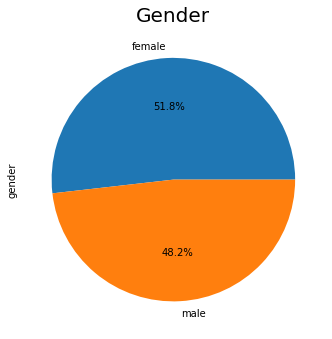

In [122]:
#Pourcentage de genre:
plt.figure(figsize=(30,10))
plt.subplots_adjust(left=0.125, bottom=0.1, right=0.9, top=0.9, wspace=0.5, hspace=0.2)
plt.subplot(141)
plt.title('Gender',fontsize = 20)
df['gender'].value_counts().plot.pie(autopct="%1.1f%%")

<AxesSubplot:title={'center':'Ethinicity'}, ylabel='race'>

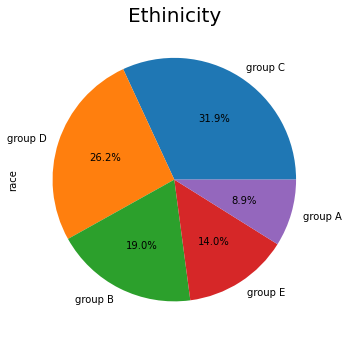

In [123]:
#Pourcentage d'ethnicité:
plt.figure(figsize=(30,10))
plt.subplots_adjust(left=0.125, bottom=0.1, right=0.9, top=0.9,wspace=0.5, hspace=0.2)
plt.subplot(142)
plt.title('Ethinicity',fontsize = 20)
df['race'].value_counts().plot.pie(autopct="%1.1f%%")

<AxesSubplot:title={'center':'Lunch'}, ylabel='lunch_type'>

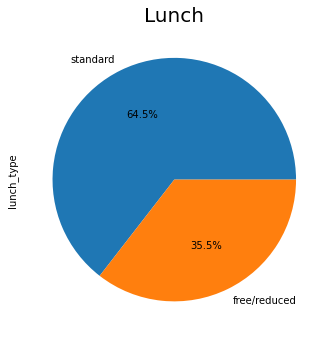

In [124]:
#Pourcentage du déjeuner:
plt.figure(figsize=(30,10))
plt.subplots_adjust(left=0.125, bottom=0.1, right=0.9, top=0.9,
                      wspace=0.5, hspace=0.2)
plt.subplot(141)
plt.title('Lunch',fontsize = 20)
df['lunch_type'].value_counts().plot.pie(autopct="%1.1f%%")

<AxesSubplot:title={'center':'parental level of education'}, ylabel='parent_education'>

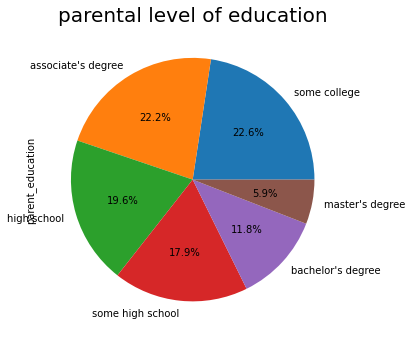

In [125]:
#Pourcentage d'éducation parentale:
plt.figure(figsize=(30,10))
plt.subplots_adjust(left=0.125, bottom=0.1, right=0.9, top=0.9,
                      wspace=0.5, hspace=0.2)
plt.subplot(141)
plt.title('parental level of education',fontsize = 20)
df['parent_education'].value_counts().plot.pie(autopct="%1.1f%%")

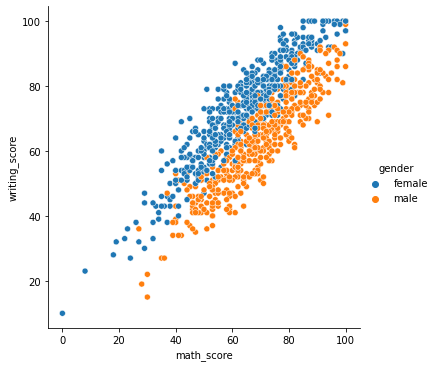

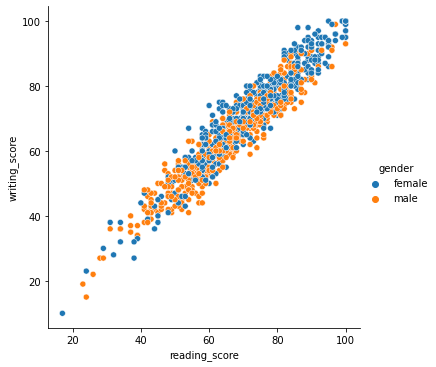

In [112]:
#en utilisant différentes méthodes de traçage comprendre les relations de variables:

sns.relplot(x='math_score',y='writing_score',hue='gender',data=df)
sns.relplot(x='reading_score*',y='writing_score',hue='gender',data=df)

C:\Users\Asus\anaconda3\lib\site-packages\seaborn\distributions.py:2551: FutureWarning: `distplot` is a deprecated function and will be removed in a future version. Please adapt your code to use either `displot` (a figure-level function with similar flexibility) or `histplot` (an axes-level function for histograms).
  warnings.warn(msg, FutureWarning)


<AxesSubplot:xlabel='writing_score', ylabel='Density'>

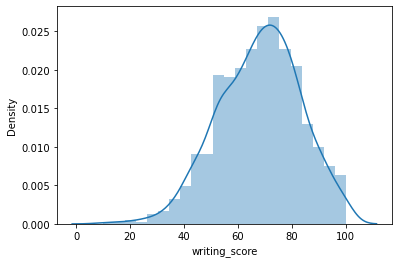

In [126]:
#Répartition du score d'écriture:
sns.distplot(df['writing_score'])

<AxesSubplot:xlabel='gender', ylabel='writing_score'>

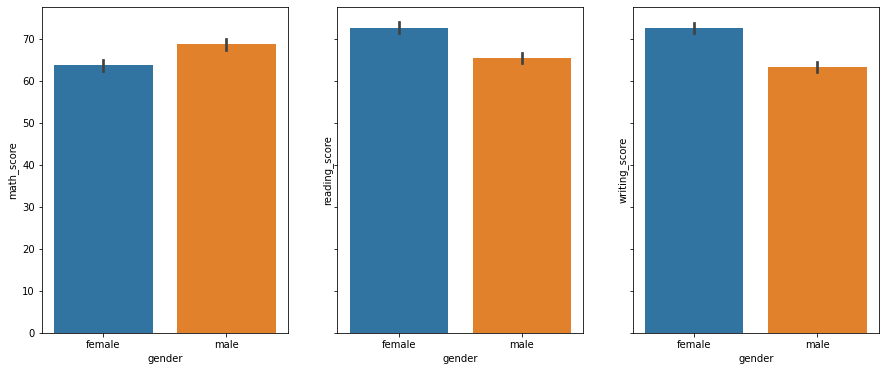

In [127]:
#BARPLOT:
fig, axs = plt.subplots(1, 3, figsize=(15, 6), sharey=True)
sns.barplot(x='gender',y='math_score',data=df, ax=axs[0])
sns.barplot(x='gender',y='reading_score',data=df, ax=axs[1])
sns.barplot(x='gender',y='writing_score',data=df, ax=axs[2])


In [128]:
# Créer une nouvelle colonne average_score
df['average_score'] = (df['reading_score'] + df['math_score'] + df['writing_score'])/3

# convertir average_score en variable catégorielle 
# Faible: 0 ~ 40 Moyenne: 40 ~ 60 Bon: 60 ~ 80 Excellent: 80 ~ 100

df['grade'] = 'na'
df.loc[(df.average_score >= 80) & (df.average_score <= 100), 'grade'] = 'excellent' 
df.loc[(df.average_score >= 60) & (df.average_score < 80), 'grade'] = 'good' 
df.loc[(df.average_score >= 40) & (df.average_score < 60), 'grade'] = 'average'
df.loc[(df.average_score >= 0) & (df.average_score < 40), 'grade'] = 'poor'
df.head()

,gender,race,parent_education,lunch_type,test_completed,math_score,reading_score,writing_score,average_score,grade
0,female,group B,bachelor's degree,standard,none,72,72,74,72.666667,good
1,female,group C,some college,standard,completed,69,90,88,82.333333,excellent
2,female,group B,master's degree,standard,none,90,95,93,92.666667,excellent
3,male,group A,associate's degree,free/reduced,none,47,57,44,49.333333,average
4,male,group C,some college,standard,none,76,78,75,76.333333,good


In [129]:
df['gender'].replace({'male':'0','female':'1'},inplace=True)
df['race'].replace({'group A':'1','group B':'2', 'group C':'3','group D':'4','group E':'5'},inplace=True)
df['lunch_type'].replace({'free/reduced':'0','standard':'1'},inplace=True)
df['test_completed'].replace({'none':'0','completed':'1'},inplace=True)
df['parent_education'].replace({'some high school':'1','high school':'1',"associate's degree":'2',
                                'some college':'3',"bachelor's degree":'4',"master's degree":'5'},inplace=True)

In [130]:
# Train model:
X = df[['gender','race','parent_education','lunch_type','test_completed','math_score','reading_score']]
y = df['writing_score']

In [131]:
df.head(10)

,gender,race,parent_education,lunch_type,test_completed,math_score,reading_score,writing_score,average_score,grade
0,1,2,4,1,0,72,72,74,72.666667,good
1,1,3,3,1,1,69,90,88,82.333333,excellent
2,1,2,5,1,0,90,95,93,92.666667,excellent
3,0,1,2,0,0,47,57,44,49.333333,average
4,0,3,3,1,0,76,78,75,76.333333,good
5,1,2,2,1,0,71,83,78,77.333333,good
6,1,2,3,1,1,88,95,92,91.666667,excellent
7,0,2,3,0,0,40,43,39,40.666667,average
8,0,4,1,0,1,64,64,67,65.000000,good
9,1,2,1,0,0,38,60,50,49.333333,average


In [132]:
# Split the data to train and test:
from sklearn import model_selection
from sklearn.model_selection import train_test_split
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.2)

In [133]:
#Sélection du modèle comme régression linéaire et entraînement du modèle:

from sklearn.linear_model import LinearRegression
regression = LinearRegression()
regression.fit(X_train,y_train)

LinearRegression()

In [134]:
#Test des performances du modèle à l'aide du carré R ajusté
from sklearn.metrics import r2_score
print((round(r2_score(y_train,regression.predict(X_train)),2))*100)

94.0


In [148]:
# implementation du modèle random forest:

from sklearn.ensemble import RandomForestRegressor

rfr = RandomForestRegressor(n_estimators = 100)
rfr.fit(X_train,y_train)
rfr_predicitions = rfr.predict(X_test) 

# R^2 Score
print("R_square score: ", r2_score(y_test,rfr_predicitions))

R_square score:  0.9213257752961204


In [147]:
## implementation du modèle l'arbres de décision:
from sklearn.tree import DecisionTreeRegressor

tree = DecisionTreeRegressor().fit(X_train, y_train)
tree_prediction = tree.predict(X_test)

print("R_square score: ", r2_score(y_test,tree_prediction))

R_square score:  0.8742672278305202
